Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-45-d77d48211e4f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


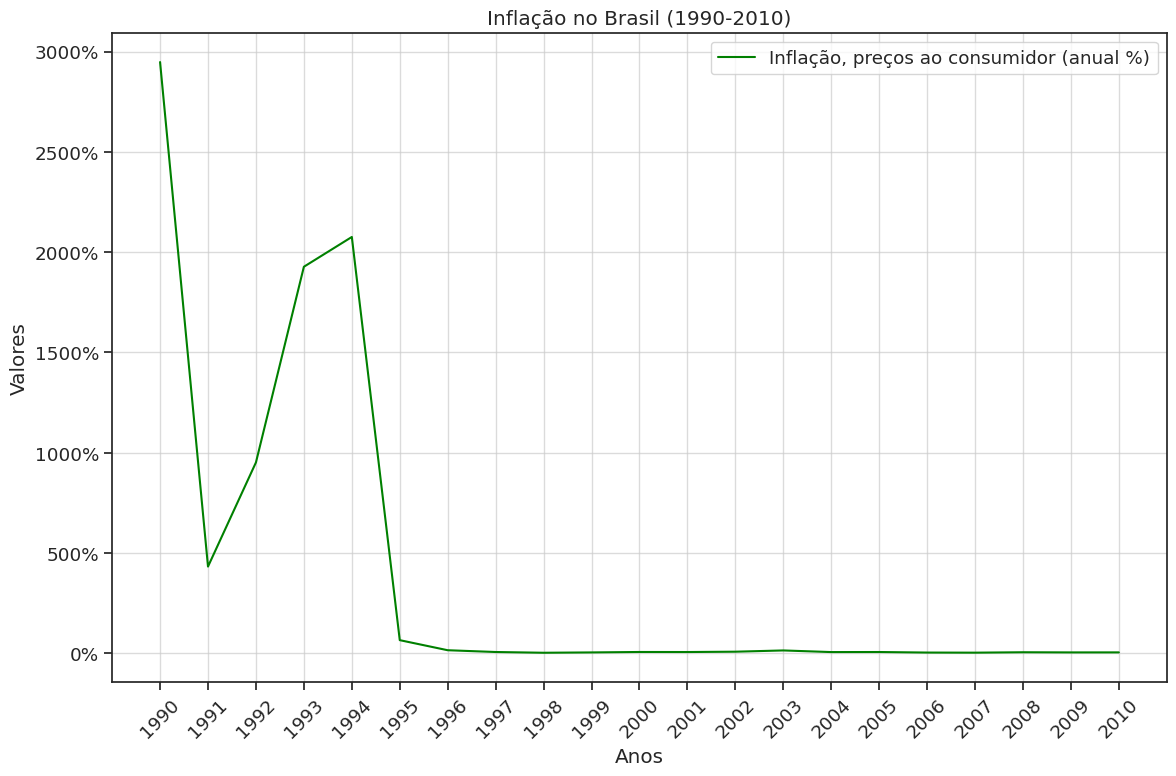

In [45]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

def montar_diretorio():
    drive.mount('/content/gdrive')

def carregar_dados(caminho, conjunto_de_dados):
    try:
        df = pd.read_csv(caminho + conjunto_de_dados, sep=';', decimal=',')
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Arquivo não encontrado na pasta. {caminho + conjunto_de_dados}")

def analisar_dados(df, indicador, codigo_do_pais, anos):
    colunas = ['Country Code'] + anos
    dados_filtrados = df[df['Indicator Name'].str.contains(indicador)][colunas]
    dados_filtrados = dados_filtrados[dados_filtrados['Country Code'] == codigo_do_pais]

    if dados_filtrados.empty:
        raise ValueError("Nenhum dado encontrado para os critérios especificados.")

    return dados_filtrados[anos]

def plotar_grafico(dados, rotulo, anos):
    plt.figure(figsize=(12, 8))
    plt.plot(anos, dados.values[0], label=rotulo, marker='', linestyle='-', color='green')
    plt.xlabel('Anos')
    plt.ylabel('Valores')
    plt.title('Inflação no Brasil (1990-2010)')
    plt.legend()
    plt.grid(True, linestyle='-', alpha=0.7)
    plt.xticks(rotation=45)
    plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
    plt.tight_layout()
    plt.show()

# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_de_dados = 'wdi_paises_america_sul_series_validas.csv'
anos = [str(ano) for ano in range(1990, 2011)]

# Montar o Google Drive
montar_diretorio()

# Carregar o conjunto de dados
df = carregar_dados(caminho, conjunto_de_dados)

# Analisar os dados para a inflação no Brasil
try:
    dados_inflacao = analisar_dados(df, 'Inflation, consumer prices', 'BRA', anos)

    # Plotar o gráfico de inflação
    plotar_grafico(dados_inflacao, 'Inflação, preços ao consumidor (anual %)', anos)

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")


